# Import Required Libraries

In [1]:
import sys

sys.path.insert(0, "../../src")
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

from WSMBSS import *
from general_utils import *
from visualization_utils import *

import warnings

warnings.filterwarnings("ignore")
# np.random.seed(100)
# %load_ext autoreload
# %autoreload 2
notebook_name = "Simplex"

# Source Generation and Mixing Scenario

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 29.99534428768563


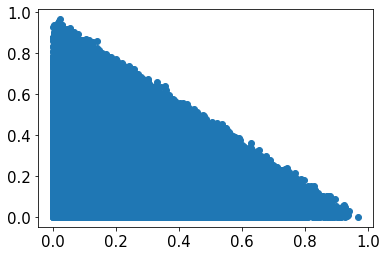

In [2]:
NumberofSources = 5
NumberofMixtures = 10
N = 500000

S = generate_uniform_points_in_simplex(NumberofSources, N)

SNR = 30
A = np.random.randn(NumberofMixtures, NumberofSources)
X = np.dot(A, S)

X, NoisePart = addWGN(X, SNR, return_noise=True)

SNRinp = 10 * np.log10(
    np.sum(np.mean((X - NoisePart) ** 2, axis=1))
    / np.sum(np.mean(NoisePart**2, axis=1))
)
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

plt.scatter(S[0, :], S[2, :])
plt.show()

# Visualize Generated Sources and Mixtures

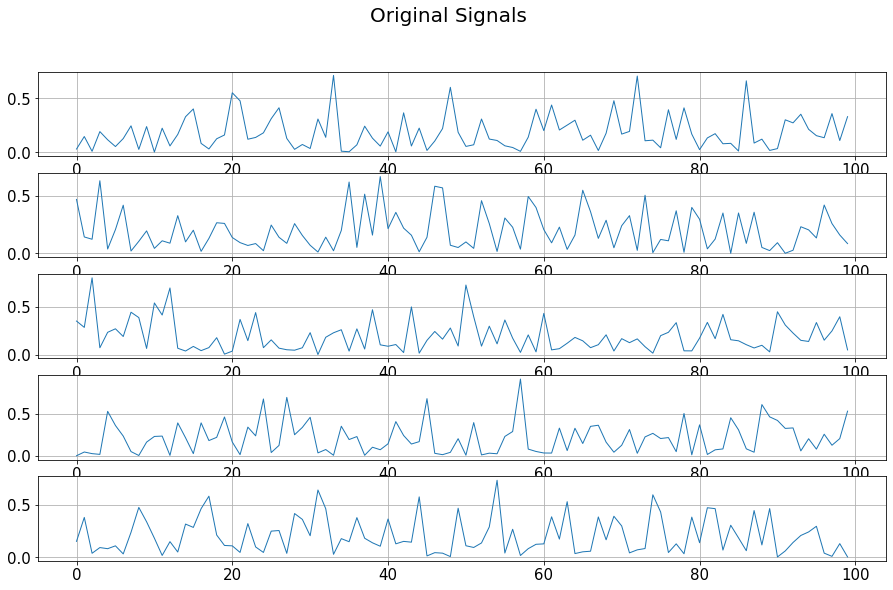

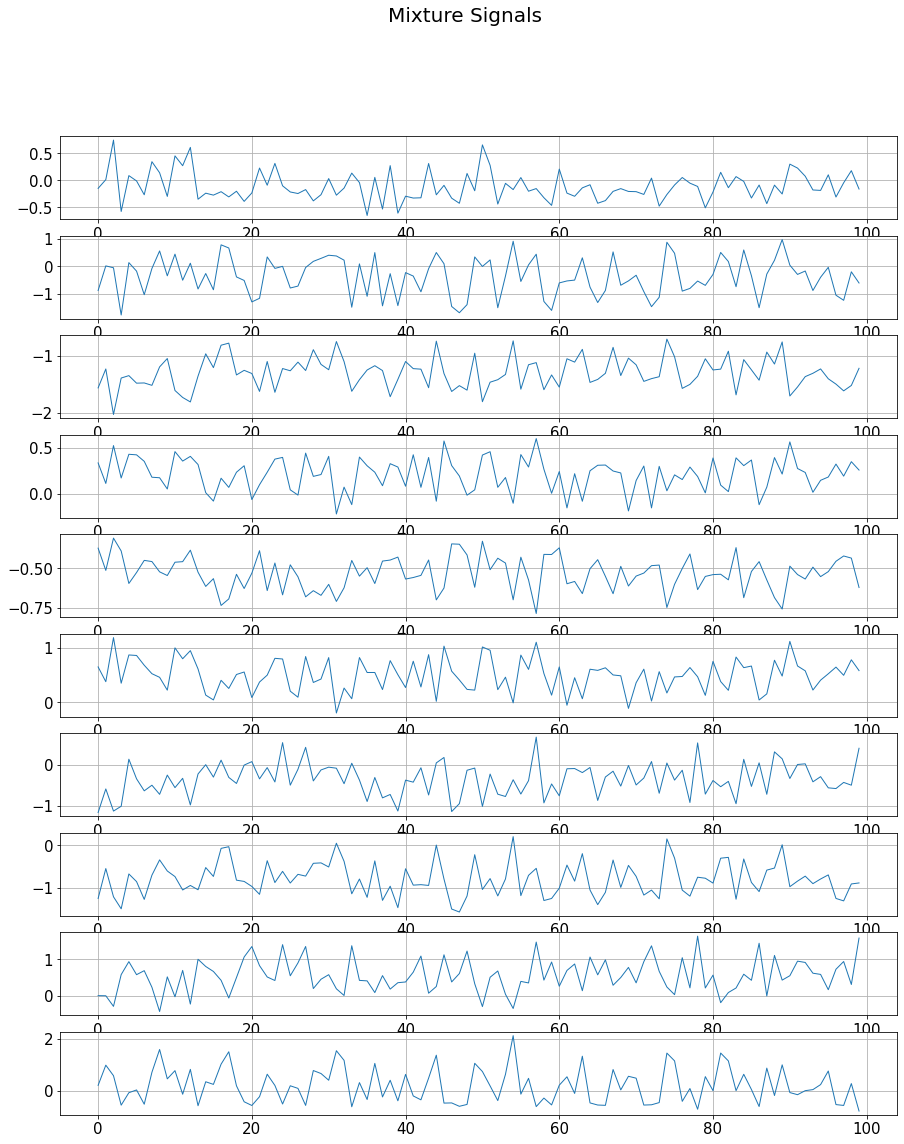

In [3]:
subplot_1D_signals(
    S[:, 0:100], title="Original Signals", figsize=(15.2, 9), colorcode=None
)
subplot_1D_signals(
    X[:, 0:100], title="Mixture Signals", figsize=(15, 18), colorcode=None
)

# Algorithm Hyperparameter Selection and Weight Initialization

In [4]:
MUS = 0.35
OUTPUT_COMP_TOL = 1e-5
MAX_OUT_ITERATIONS = 3000
LayerGains = [1, 1]
LayerMinimumGains = [1, 1]
LayerMaximumGains = [1e6, 1.001]
WScalings = [0.0033, 0.0033]
GamScalings = [0.01, 0.1]
zeta = 1e-4
beta = 0.5
muD = [20, 1e-2]

# OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
synaptic_lr_rule = "divide_by_log_index"
# OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
neural_loop_lr_rule = "divide_by_slow_loop_index"
s_dim = S.shape[0]
x_dim = X.shape[0]
h_dim = s_dim
samples = S.shape[1]
W_HX = np.eye(h_dim, x_dim)
W_YH = np.eye(s_dim, h_dim)

# MUS = 0.25
# OUTPUT_COMP_TOL = 1e-5
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [1,1]
# LayerMinimumGains = [.51,.51]
# LayerMaximumGains = [1e6,1.001]
# WScalings = [0.0033,0.0033]
# GamScalings = [0.01,0.01]
# zeta = 1e-4
# beta = 0.5
# muD = [5, 1]

# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)

MUS = 0.1
gammaM_start = [MUS, MUS]
gammaM_stop = [1e-3, 1e-3]
gammaW_start = [MUS, MUS]
gammaW_stop = [1e-3, 1e-3]

OUTPUT_COMP_TOL = 1e-5
MAX_OUT_ITERATIONS = 3000
LayerGains = [1, 1]
LayerMinimumGains = [1, 1]
LayerMaximumGains = [1e6, 1.001]
WScalings = [0.0033, 0.0033]
GamScalings = [0.1, 0.1]
zeta = 1e-4
beta = 0.5
muD = [5, 1e-2]

s_dim = S.shape[0]
x_dim = X.shape[0]
h_dim = s_dim
samples = S.shape[1]
W_HX = np.eye(h_dim, x_dim)
W_YH = np.eye(s_dim, h_dim)

# OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
synaptic_lr_rule = "divide_by_log_index"
# OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
neural_loop_lr_rule = "constant"
synaptic_lr_decay_divider = 1
neural_lr_decay_multiplier = 0.01

# Run WSM Algorithm on Mixture Signals

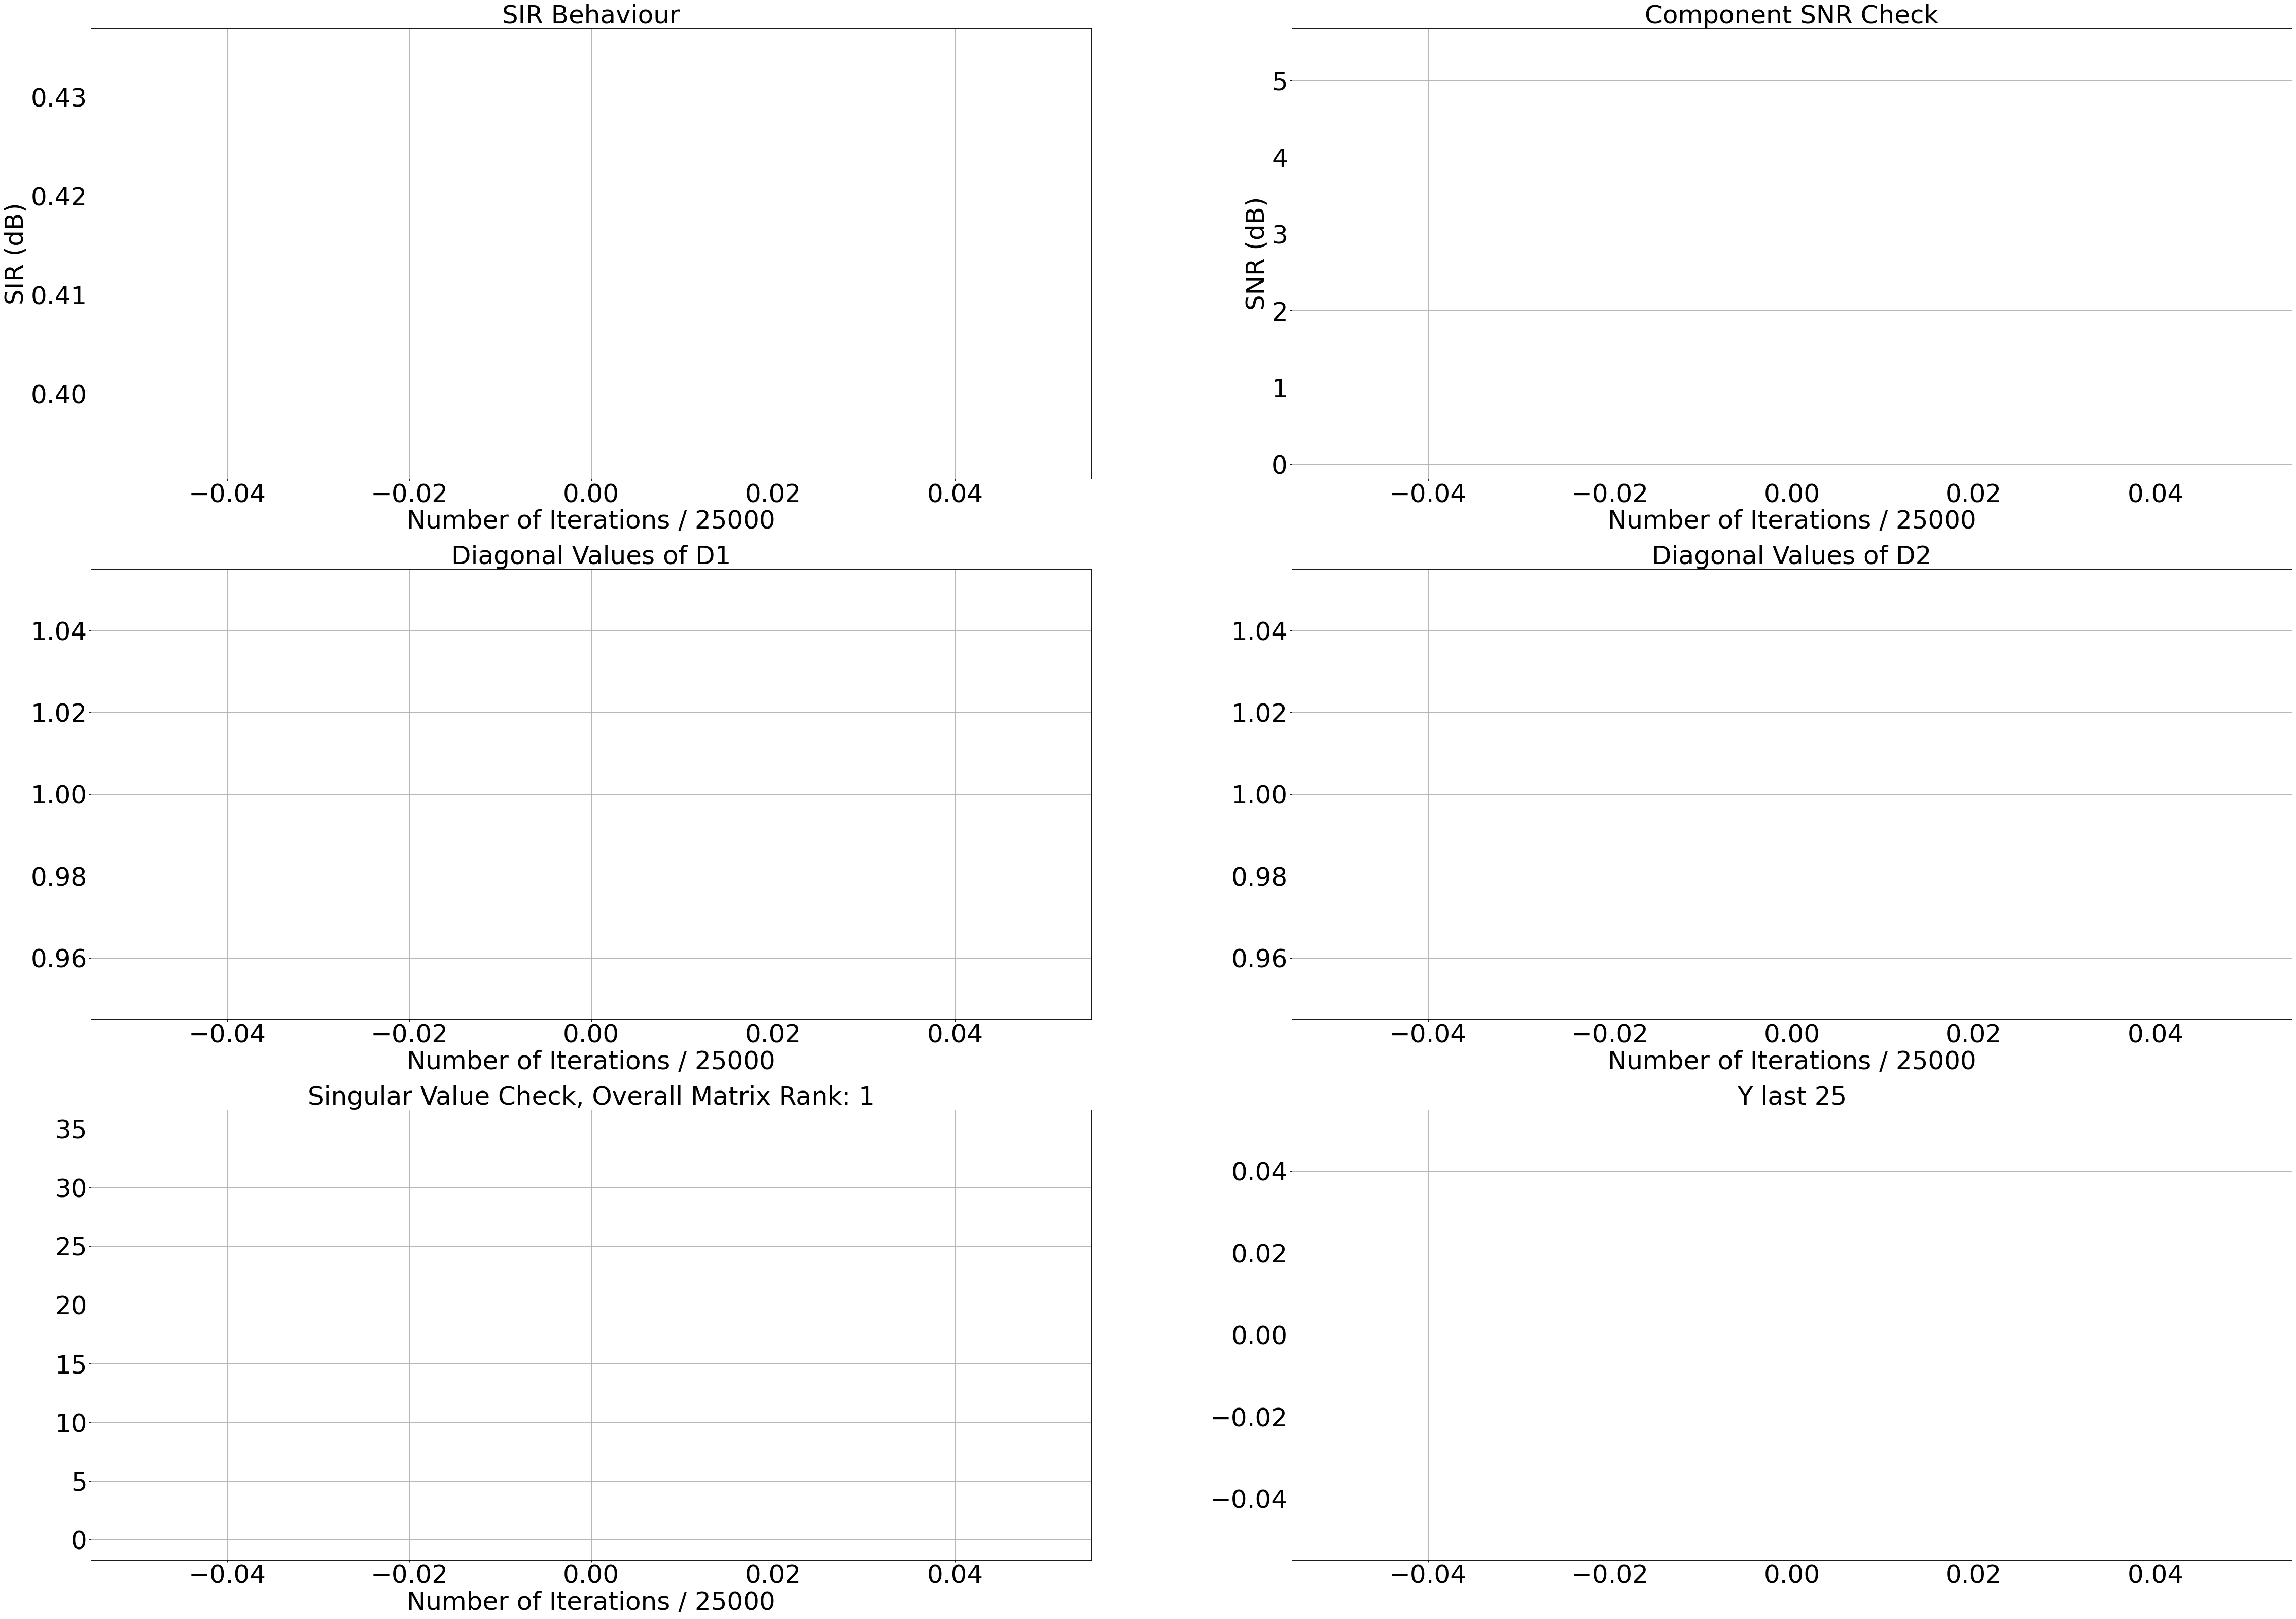

  1%|          | 2843/500000 [00:41<2:00:05, 68.99it/s]


ZeroDivisionError: division by zero

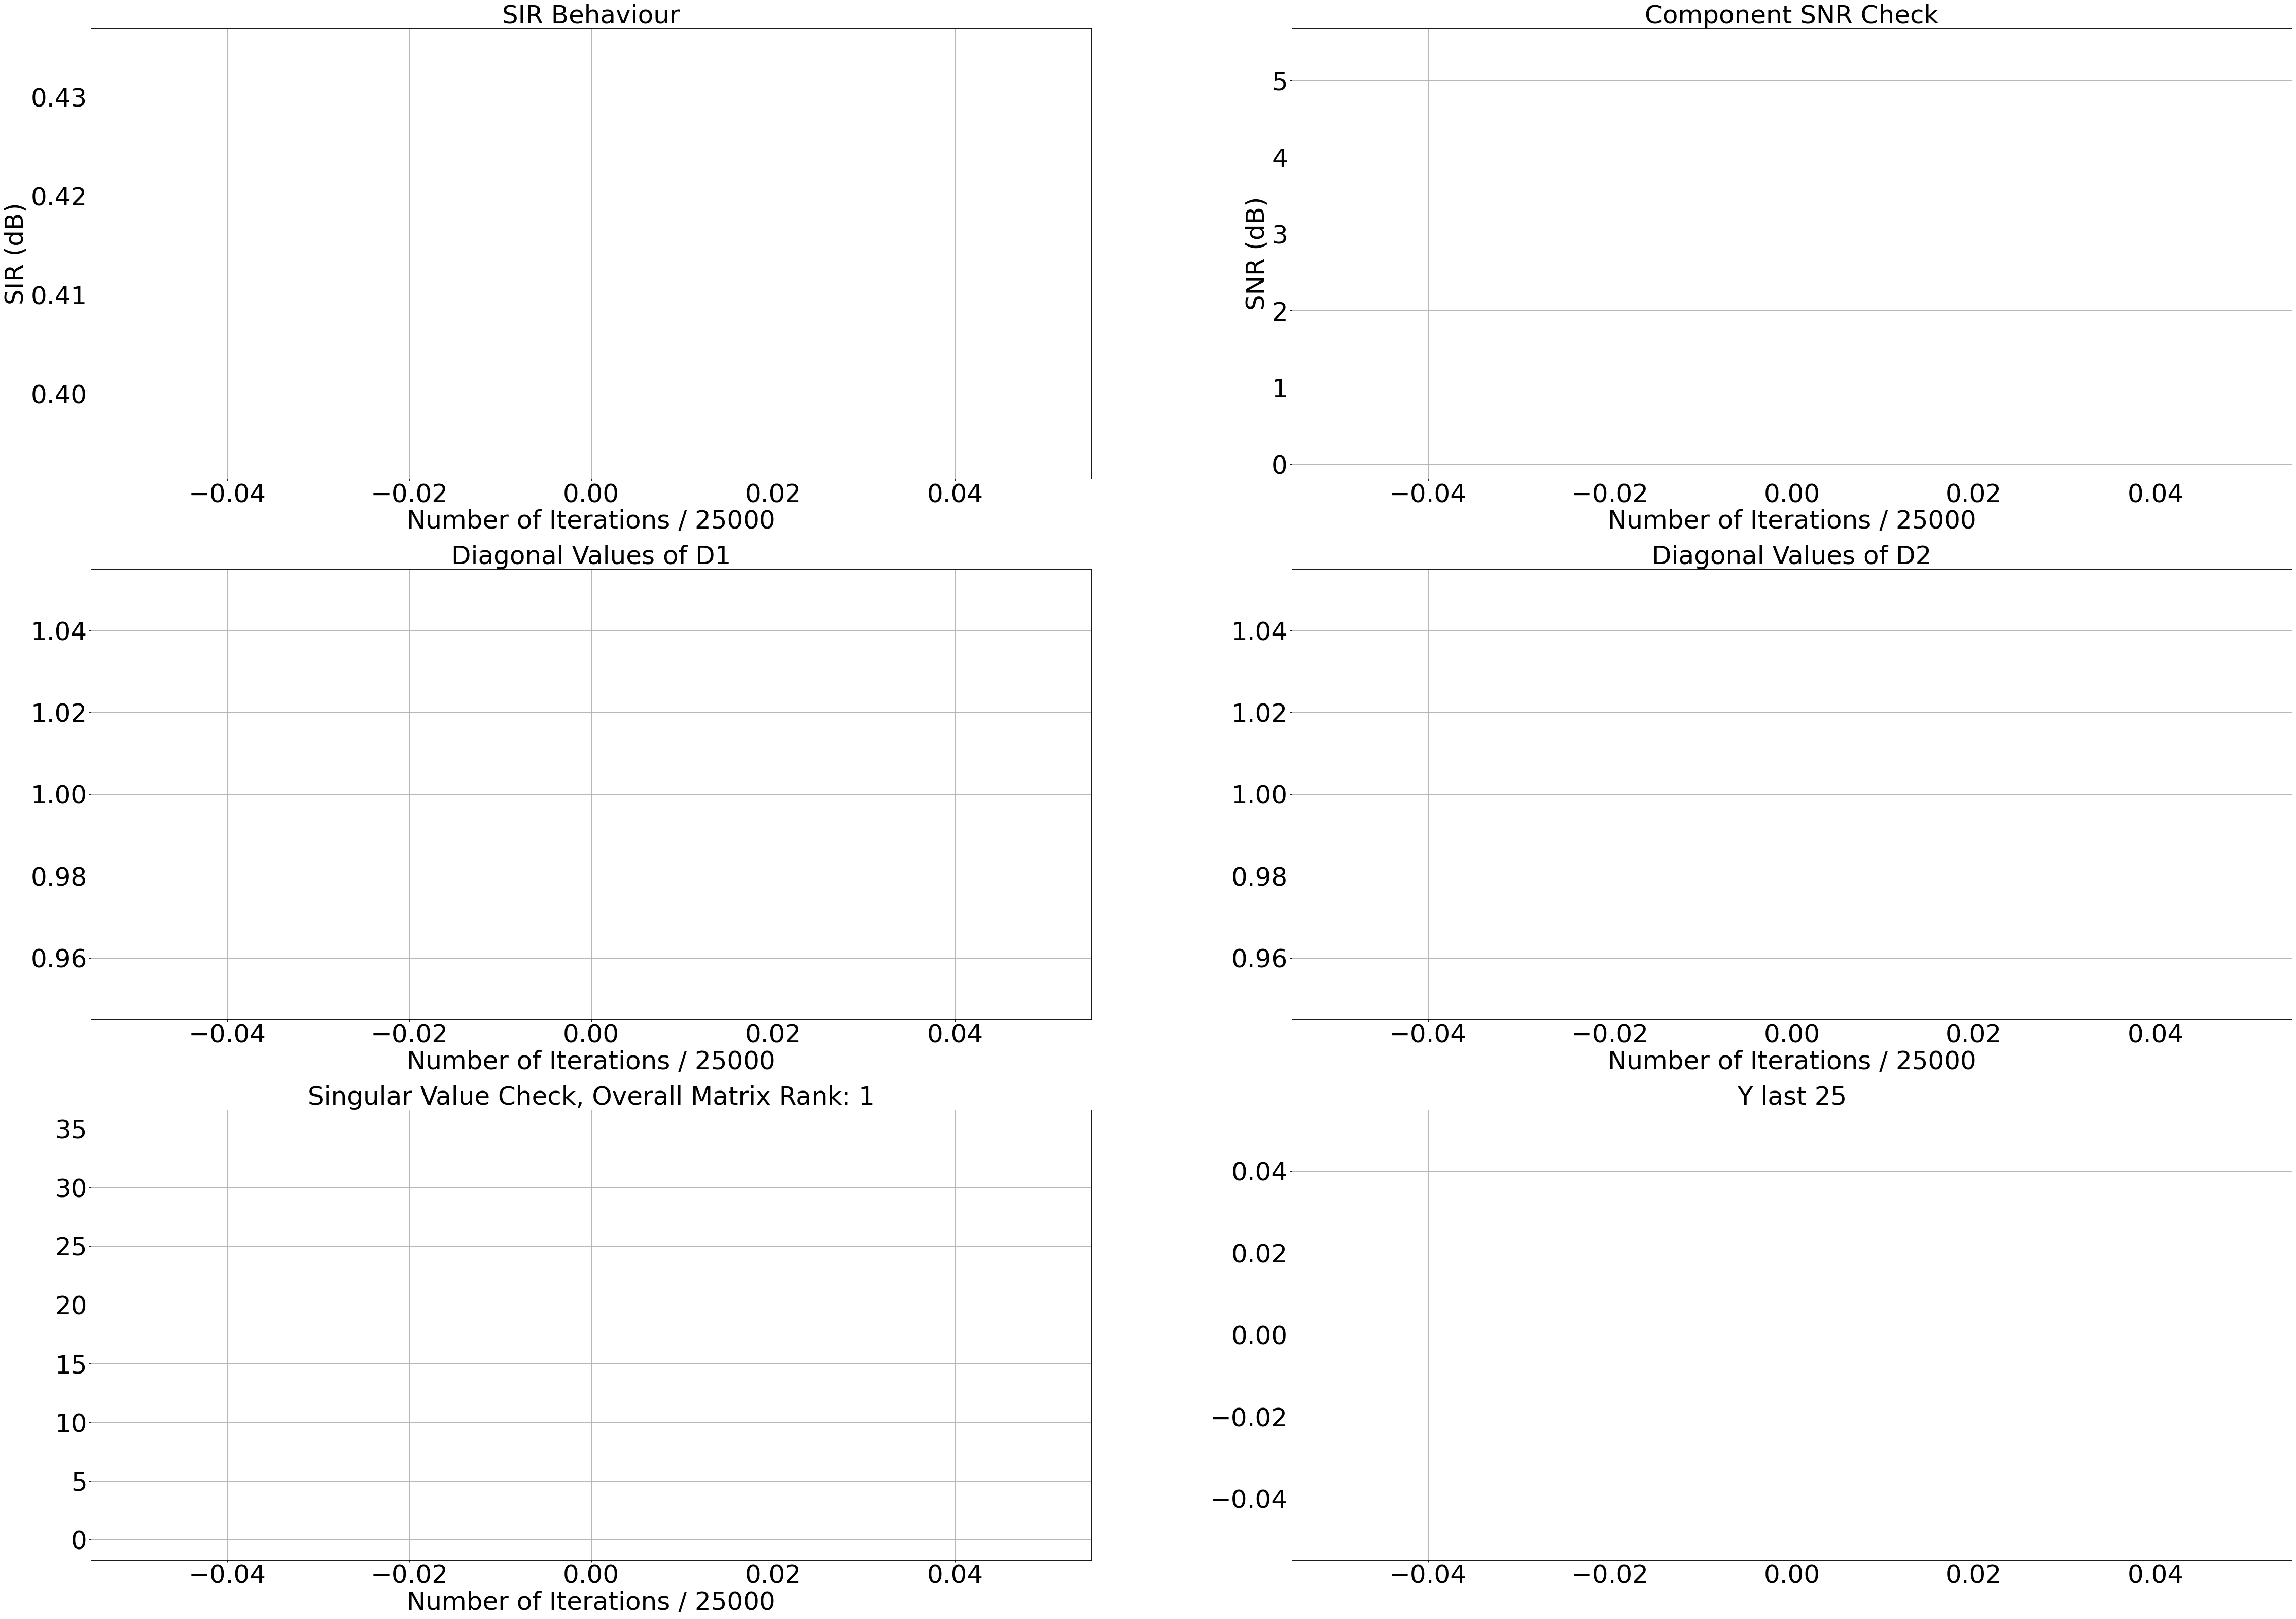

In [5]:
# # debug_iteration_point = 10000

# # model = OnlineWSMBSS(s_dim = s_dim, x_dim = x_dim, h_dim = h_dim,
# #                      gamma_start = MUS, beta = beta, zeta = zeta,
# #                      muD = muD,WScalings = WScalings,
# #                      W_HX = W_HX, W_YH = W_YH,
# #                      DScalings = LayerGains, LayerMinimumGains = LayerMinimumGains,
# #                      LayerMaximumGains = LayerMaximumGains,neural_OUTPUT_COMP_TOL = OUTPUT_COMP_TOL,
# #                      set_ground_truth = True, S = S, A = A)

# # model.fit_batch_simplex(X, n_epochs = 1, neural_lr_start = 0.9, neural_lr_stop = 0.05,
# #                         shuffle = False, synaptic_lr_rule = synaptic_lr_rule,
# #                         neural_loop_lr_rule = neural_loop_lr_rule,
# #                         hidden_layer_gain = 2, debug_iteration_point = debug_iteration_point,
# #                         plot_in_jupyter = True)

# debug_iteration_point = 25000

# model = OnlineWSMBSS(s_dim = s_dim, x_dim = x_dim, h_dim = h_dim,
#                      gamma_start = MUS, beta = beta, zeta = zeta,
#                      muD = muD,WScalings = WScalings,
#                      W_HX = W_HX, W_YH = W_YH,
#                      DScalings = LayerGains, LayerMinimumGains = LayerMinimumGains,
#                      LayerMaximumGains = LayerMaximumGains,neural_OUTPUT_COMP_TOL = OUTPUT_COMP_TOL,
#                      set_ground_truth = True, S = S, A = A)

# model.fit_batch_simplex(X, n_epochs = 1,
#                         neural_lr_start = 0.9, shuffle = False,
#                         debug_iteration_point = debug_iteration_point,
#                         plot_in_jupyter = True)
debug_iteration_point = 25000

model = OnlineWSMBSS(
    s_dim=s_dim,
    x_dim=x_dim,
    h_dim=h_dim,
    gammaM_start=gammaM_start,
    gammaM_stop=gammaM_stop,
    gammaW_start=gammaW_start,
    gammaW_stop=gammaW_stop,
    beta=beta,
    zeta=zeta,
    muD=muD,
    WScalings=WScalings,
    W_HX=W_HX,
    W_YH=W_YH,
    DScalings=LayerGains,
    LayerMinimumGains=LayerMinimumGains,
    LayerMaximumGains=LayerMaximumGains,
    neural_OUTPUT_COMP_TOL=OUTPUT_COMP_TOL,
    set_ground_truth=True,
    S=S,
    A=A,
)

model.fit_batch_simplex(
    X,
    n_epochs=1,
    neural_lr_start=0.5,
    neural_lr_stop=0.5,
    synaptic_lr_rule=synaptic_lr_rule,
    neural_loop_lr_rule=neural_loop_lr_rule,
    synaptic_lr_decay_divider=1,
    neural_lr_decay_multiplier=neural_lr_decay_multiplier,
    clip_gain_gradients=True,
    gain_grads_clipping_multiplier = 1,
    use_newton_steps_for_gains = False,
    debug_iteration_point=debug_iteration_point,
    plot_in_jupyter=True,
)

# Visualize SNR Convergence of Each Source Component

In [ ]:
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
plot_convergence_plot(
    model.SNR_list,
    xlabel="Number of Iterations / {}".format(debug_iteration_point),
    ylabel="SINR (dB)",
    title="SINR Convergence Plot",
    colorcode=None,
    linewidth=1.8,
)

# Calculate Resulting Component SNRs and Overall SINR

In [ ]:
Szeromean = S - S.mean(axis=1).reshape(-1, 1)
Wf = model.compute_overall_mapping(return_mapping=True)
Y_ = Wf @ X
Yzeromean = Y_ - Y_.mean(axis=1).reshape(-1, 1)
Y_ = model.signed_and_permutation_corrected_sources(Szeromean, Yzeromean)
coef_ = ((Y_ * Szeromean).sum(axis=1) / (Y_ * Y_).sum(axis=1)).reshape(-1, 1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr_jit(Szeromean, Y_)))

SINRwsm = 10 * np.log10(CalculateSINRjit(Y_, S, False)[0])

print("Overall SINR : {}".format(SINRwsm))

# Vizualize Extracted Signals Compared to Original Sources

In [ ]:
k = 2500
subplot_1D_signals(
    Y_[:, k : k + 100],
    title="Extracted Signals (Sign and Permutation Corrected)",
    figsize=(15.2, 9),
    colorcode=None,
)
subplot_1D_signals(
    S[:, k : k + 100], title="Original Signals", figsize=(15.2, 9), colorcode=None
)

In [ ]:
import mir_eval

In [ ]:
S.shape, Y_.shape

In [ ]:
mir_eval.separation.bss_eval_sources(S, Y_, compute_permutation=True)